In [6]:
from datasets import load_dataset,Dataset,load_from_disk
import json
import pandas as pd
import re


In [402]:
job_descriptions = [
    {"job": "HR", "description": "Responsible for recruitment, employee relations, performance evaluation, and training & development to ensure effective human resource allocation and achievement of organizational goals."},
    {"job": "DESIGNER", "description": "Create innovative designs, including graphic design, UI/UX, or product design, to enhance the company's brand and provide creative solutions."},
    {"job": "INFORMATION-TECHNOLOGY", "description": "Develop, maintain, and optimize the company's technical infrastructure, ensure system security and efficiency, and provide technical support for business operations."},
    {"job": "TEACHER", "description": "Design lesson plans, teach specific subjects, inspire students' interest in learning, and support their academic and personal development."},
    {"job": "ADVOCATE", "description": "Provide legal consultation, prepare legal documents, and represent clients in court or arbitration to protect their rights and interests."},
    {"job": "BUSINESS-DEVELOPMENT", "description": "Identify market opportunities, manage client relationships, and develop sales channels to drive business growth and achieve company goals."},
    {"job": "HEALTHCARE", "description": "Deliver high-quality healthcare services, assist in diagnosing and treating patients, and ensure their physical and mental well-being."},
    {"job": "FITNESS", "description": "Design and guide personalized fitness plans to help clients achieve health and fitness goals, offering advice on exercise and nutrition."},
    {"job": "AGRICULTURE", "description": "Manage farm operations, including planting, harvesting, and resource management, to improve agricultural productivity and meet market demands."},
    {"job": "BPO", "description": "Provide efficient outsourcing services, including customer support, data processing, and back-office operations, ensuring excellent client experiences."},
    {"job": "SALES", "description": "Achieve sales targets by developing markets and maintaining customer relationships, providing solutions to meet client needs and drive revenue."},
    {"job": "CONSULTANT", "description": "Offer professional advice and strategic guidance to clients to optimize business processes and solve critical challenges."},
    {"job": "DIGITAL-MEDIA", "description": "Develop and execute digital marketing strategies to enhance brand influence on social media, search engines, and content platforms."},
    {"job": "AUTOMOBILE", "description": "Work in automotive design, manufacturing, or sales to drive technical innovation and deliver high-quality automotive products and services."},
    {"job": "CHEF", "description": "Design menus, prepare dishes, and ensure food quality to provide customers with an exceptional dining experience."},
    {"job": "FINANCE", "description": "Manage financial planning, budgeting, and reporting to ensure the company's financial health and support strategic decision-making."},
    {"job": "APPAREL", "description": "Contribute to clothing design, production, or sales, ensuring product quality and meeting customer needs while keeping up with fashion trends."},
    {"job": "ENGINEERING", "description": "Design, develop, and maintain technical solutions to ensure efficiency, safety, and reliability in products or projects."},
    {"job": "ACCOUNTANT", "description": "Handle financial data recording, auditing, and tax filing to ensure the company's financial compliance and operational efficiency."},
    {"job": "CONSTRUCTION", "description": "Plan and execute construction projects, supervise the building process, and ensure projects meet safety standards and deadlines."},
    {"job": "PUBLIC-RELATIONS", "description": "Manage the company's relations with the public and media, design PR campaigns, and enhance brand image and public trust."},
    {"job": "BANKING", "description": "Provide financial services, including client consultation, account management, loan processing, and investment advice to meet customers' financial needs."},
    {"job": "ARTS", "description": "Engage in artistic creation or education, using creative expression in visual, auditory, or performing arts to evoke emotional resonance from audiences."},
    {"job": "AVIATION", "description": "Handle aviation operations, including aircraft maintenance, flight operations, or passenger services, ensuring flight safety and exceptional traveler experiences."}
]

In [410]:
# Convert to DataFrame
df = pd.DataFrame(job_descriptions)

# Save to CSV file
csv_file_path = "D:/wfy/datasets/Resume/job_describe/job_descriptions.csv"
# df.to_csv(csv_file_path, index=False)
df.loc[df['job'] == 'HR', 'description'].values[0]

'Responsible for recruitment, employee relations, performance evaluation, and training & development to ensure effective human resource allocation and achievement of organizational goals.'

In [6]:
# 加载生成的简历数据
with open("D:/wfy/datasets/FairCV/data/resumes.json", "r", encoding="utf-8") as f:
    resumes = json.load(f)



In [10]:
# 查看第一份简历
a=json.dumps(resumes[0], ensure_ascii=False, indent=2)

In [2]:
df = pd.read_csv('D:/wfy/datasets/Resume/resume/Resume.csv')
df.drop(['ID', 'Resume_html'], axis=1, inplace=True)
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [4]:
def clean_resume(resume_str):
    # Remove extra whitespaces and newline characters
    cleaned_text = re.sub('\s+', ' ', resume_str).strip()

    # Remove URLs
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text, flags=re.MULTILINE)

    # Remove @ mentions
    cleaned_text = re.sub(r'@\S+', '', cleaned_text)

    # Remove hashtags
    cleaned_text = re.sub(r'#\S+', '', cleaned_text)

    # Remove RT (retweets) and CC (carbon copies)
    cleaned_text = re.sub(r'\bRT\b|\bCC\b', '', cleaned_text)

    # Remove non-alphanumeric characters and special characters except spaces
    cleaned_text = re.sub('[^A-Za-z0-9\s]', '', cleaned_text)

    # Remove multiple consecutive spaces
    cleaned_text = re.sub(' +', ' ', cleaned_text)

    return cleaned_text

def remove_text_before_summary(text):
    # 找到 "Summary" 的位置
    summary_index = text.find("Summary")
    if summary_index != -1:
        # 保留从 "Summary" 开始的部分
        return text[summary_index:]
    else:
        # 如果找不到 "Summary"，返回原始文本
        return text

In [5]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [6]:
df['Resume_str'] = df['Resume_str'].apply(lambda x: clean_resume(x))
df['Resume_str'] = df['Resume_str'].apply(lambda x: remove_text_before_summary(x))

In [7]:
# additional_sentences = [
#     {"sentence": "He is a Black man.", "race": "Black", "gender": "Male"},
#     {"sentence": "He is a White man.", "race": "White", "gender": "Male"},
#     {"sentence": "She is a Black woman.", "race": "Black", "gender": "Female"},
#     {"sentence": "She is a White woman.", "race": "White", "gender": "Female"}
# ]
gender_sentences = [
    {"sentence": "He is a man.",  "gender": "Male"},
    {"sentence": "She is a woman.", "gender": "Female"}
]
race_sentences = [
    {"sentence": "He is a Black man.", "race": "Black"},
    {"sentence": "He is a White man.", "race": "White"},
]
new_data = []
for _, row in df.iterrows():
    for entry in race_sentences:
        # 构建新数据
        new_data.append({
            "Resume_str": f"{entry['sentence']} {row['Resume_str']}",
            "Category": row["Category"],
            "race": entry["race"]
        })

# 转为新的 DataFrame
new_df = pd.DataFrame(new_data)



In [10]:
dataset = Dataset.from_pandas(new_df)
dataset.save_to_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_race')

Saving the dataset (1/1 shards): 100%|██████████| 4968/4968 [00:00<00:00, 472822.83 examples/s]


In [518]:
resume = pd.read_csv("D:/wfy/datasets/Resume/resumeupdated_resumes_with_gender.csv")
dataset = Dataset.from_pandas(resume)
dataset.save_to_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_gender')


Saving the dataset (1/1 shards): 100%|██████████| 4968/4968 [00:00<00:00, 498619.34 examples/s]


In [12]:
def encode_gender(example):
    example["gender_encoded"] = 0 if example["gender"] == "Female" else 1
    return example
def encode_race(example):
    example["race_encoded"] = 0 if example["race"] == "Black" else 1
    return example

In [13]:
race_data = load_from_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_race')
race_data = race_data.map(encode_race)

Map: 100%|██████████| 4968/4968 [00:00<00:00, 31547.39 examples/s]


In [15]:
race_data.save_to_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_race_encode')

Saving the dataset (1/1 shards): 100%|██████████| 4968/4968 [00:00<00:00, 332333.37 examples/s]


In [17]:
data = load_from_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_gender')
data = data.map(encode_gender)
data.save_to_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_gender_encode')

Saving the dataset (1/1 shards): 100%|██████████| 4968/4968 [00:00<00:00, 249223.20 examples/s]

In [18]:
data=load_from_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_gender_encode')
data

Dataset({
    features: ['Resume_str', 'Category', 'gender', 'gender_encoded'],
    num_rows: 4968
})

In [4]:
from sklearn.model_selection import train_test_split
from transformers import BigBirdTokenizer

In [36]:
tokenizer = BigBirdTokenizer.from_pretrained("D:/wfy/model/bigbird-roberta-base")
def tokenize_function(texts):
    return tokenizer(
        texts['Resume_str'],
        padding="max_length",  # 填充到最大长度
        truncation=True,       # 截断超长文本
        max_length=2048,       # 最大长度为 4096 
    )
data=data.map(tokenize_function)

Map: 100%|██████████| 9936/9936 [00:29<00:00, 334.35 examples/s]


In [14]:
def encode(example):
    example["race_encoded"] = 0 if example["race"] == "Black" else 1
    example["gender_encoded"] = 0 if example["gender"] == "Female" else 1
    return example


In [40]:
data.save_to_disk('D:/wfy/datasets/Resume/resume/resume_dataset_processed')

Saving the dataset (1/1 shards): 100%|██████████| 9936/9936 [00:00<00:00, 169264.47 examples/s]


In [20]:
train_dataset = load_from_disk('D:/wfy/datasets/Resume/resume/train_dataset')
test_dataset = load_from_disk('D:/wfy/datasets/Resume/resume/test_dataset')
train_dataset=train_dataset.map(encode)
test_dataset=test_dataset.map(encode)

In [23]:
train_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/train_dataset_encoded')
test_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/test_dataset_encoded')

Saving the dataset (1/1 shards): 100%|██████████| 1988/1988 [00:00<00:00, 488876.43 examples/s]


In [31]:
train_dataset = load_from_disk('D:/wfy/datasets/Resume/resume/train_dataset_encoded')
test_dataset = load_from_disk('D:/wfy/datasets/Resume/resume/test_dataset_encoded')
train_dataset

Dataset({
    features: ['Resume_str', 'Category', 'race', 'gender', 'input_ids', 'attention_mask', 'race_encoded', 'gender_encoded'],
    num_rows: 7948
})

In [19]:
from sklearn.preprocessing import LabelEncoder
# 初始化 LabelEncoder
label_encoder = LabelEncoder()
data = {
    "Profession": ['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 
                   'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 
                   'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 
                   'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 
                   'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']
}
# 将 Profession 列进行编码
def encode_profession(example):
    example['category_encoded'] = label_encoder.fit_transform(data['Profession'])[list(data['Profession']).index(example['Category'])]
    return example

In [33]:
train_dataset = train_dataset.map(encode_profession)
test_dataset = test_dataset.map(encode_profession)

Map: 100%|██████████| 1988/1988 [00:00<00:00, 9070.95 examples/s]


In [40]:
test_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/test_dataset_all_encoded')
train_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/train_dataset_all_encoded')

Saving the dataset (1/1 shards): 100%|██████████| 7948/7948 [00:00<00:00, 106147.04 examples/s]


In [6]:
job_description = pd.read_csv('D:/wfy/datasets/Resume/job_describe/training_data.csv')
job_description = job_description[["job_description", "position_title"]][:15]


In [43]:
from transformers import AutoTokenizer, AutoModel

In [44]:
tokenizer = AutoTokenizer.from_pretrained('D:/wfy/model/MiniLM-L6-v2')

In [400]:
test_dataset=load_from_disk('D:/wfy/datasets/Resume/resume/test_dataset_all_encoded')
train_dataset=load_from_disk('D:/wfy/datasets/Resume/resume/train_dataset_all_encoded')
train_dataset

Dataset({
    features: ['Resume_str', 'Category', 'race', 'gender', 'input_ids', 'attention_mask', 'race_encoded', 'gender_encoded', 'category_encoded'],
    num_rows: 7948
})

In [46]:
def tokenize_function(texts):
    return tokenizer(
        texts['Resume_str'],
        padding="max_length",  # 填充到最大长度
        truncation=True,       # 截断超长文本
        max_length=512,       # 最大长度为 4096 
    )

In [47]:
test_dataset = test_dataset.map(tokenize_function)
train_dataset = train_dataset.map(tokenize_function)

Map: 100%|██████████| 7948/7948 [00:14<00:00, 539.79 examples/s]


In [48]:
test_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/test_dataset_all_encoded_MiniLM')
train_dataset.save_to_disk('D:/wfy/datasets/Resume/resume/train_dataset_all_encoded_MiniLM')

Saving the dataset (1/1 shards): 100%|██████████| 7948/7948 [00:00<00:00, 199427.66 examples/s]


In [733]:
data = load_from_disk('D:/wfy/datasets/Resume/resume/resume_dataset_with_gender_encode')
data[1]

{'Resume_str': 'She is a woman. Summary Dedicated Customer Service Manager with 15 years of experience in Hospitality and Customer Service Management Respected builder and leader of customerfocused teams strives to instill a shared enthusiastic commitment to customer service Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multitasker Client relations specialist Accomplishments Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification Accomplished Trainer for cross server hospitality systems such as Hilton OnQ Micros Opera PMS Fidelio OPERA Reservation System ORS Holidex Completed courses and seminars in customer service sales strategies inventory control loss prevention safety time management leadership and performance assessment Experience HR AdministratorMarketing Associate HR Administrat

In [7]:
import numpy as np
import pandas as pd

def compute_rRD(df, rank_cutoffs, protected_column='Gender', protected_value=-1):
    """
    计算 rRD(τ) 指标，基于受保护组和非受保护组。

    参数:
    - df (pd.DataFrame): 数据集，按排名从高到低排序。
    - rank_cutoffs (list): 排名的截断点列表，例如 [10, 20, 30]。
    - protected_column (str): 受保护属性列名称，默认 'Gender'。
    - protected_value (int): 表示受保护组的值，默认 1。

    返回:
    - rRD (float): 计算的 rRD 值。
    """
    # 数据集总人数
    total_items = len(df)
    
    # 受保护组 (S+) 的总人数
    S_plus_count = df[df[protected_column] == protected_value].shape[0]
    
    # 非受保护组 (S-) 的总人数
    S_minus_count = total_items - S_plus_count

    # 全局比例: S+ / S-
    global_ratio = S_plus_count / S_minus_count
    
    # 初始化加权绝对偏差和
    weighted_sum = 0
    ideal = 0
    # 遍历截断点
    for cutoff in rank_cutoffs:
        # 取前 cutoff 名的子集
        top_k = df.iloc[:cutoff]
        
        # 计算前 cutoff 名中 S+ 的人数 |S+_{1:i}|
        S_plus_top_k = top_k[top_k[protected_column] == protected_value].shape[0]
        
        # 计算前 cutoff 名中 S- 的人数 |S-_{1:i}|
        S_minus_top_k = cutoff - S_plus_top_k

        # 如果 |S-_{1:i}| 为 0，跳过计算（避免除零错误）
        if S_minus_top_k == 0:
            continue
        
        # 计算前 cutoff 名的比例: |S+_{1:i}| / |S-_{1:i}|
        top_k_ratio = S_plus_top_k / S_minus_top_k
        # 计算绝对偏差
        abs_diff = abs(top_k_ratio - global_ratio)
        
        # 计算权重 1 / log2(cutoff)
        weight = 1 / np.log2(cutoff)
        
        # 加权累积
        weighted_sum += weight * abs_diff

    # 归一化常数 Z
    Z = sum(1 / np.log2(cutoff) for cutoff in rank_cutoffs)
    
    # 计算 rRD
    rRD = weighted_sum / Z
    return rRD

def GED(result_sorted):
    N = 50
    bias_score = 0
    for i in range(N):
        g = result_sorted.iloc[i]["Gender"]  # 性别值
        bias_score += (1 / np.log2(1 + i+1)) * g

    bias_score /= N  # 归一化
    return abs(bias_score)
def mean_rank(result_sorted):
    cum_rank_0 = 0
    cum_item_0 = result_sorted[result_sorted['Gender'] == -1].shape[0]
    cum_rank_1 = 0
    cum_item_1 = result_sorted[result_sorted['Gender'] == 1].shape[0]
    for i in range(len(result_sorted)):
        if result_sorted.iloc[i]['Gender'] == -1:
            cum_rank_0+=i+1
        else:
            cum_rank_1+=i+1
    return cum_rank_0/cum_item_0,cum_rank_1/cum_item_1
        


In [30]:
rank_cutoffs = [10,20,30,40,50]
Z = sum(1 / np.log2(cutoff) for cutoff in rank_cutoffs)
mapping = {
    'DESIGNER': 'DES',
    'APPAREL': 'APP',
    'SALES': 'SAL',
    'ENGINEERING': 'ENG',
    'TEACHER': 'TEA',
    'BUSINESS-DEVELOPMENT': 'BD',
    'PUBLIC-RELATIONS': 'PR',
    'ARTS': 'ARTS',
    'CONSTRUCTION': 'CON',
    'DIGITAL-MEDIA': 'DM',
    'CHEF': 'CHEF',
    'HR': 'HR',
    'AUTOMOBILE': 'AUTO',
    'ADVOCATE': 'ADV',
    'AVIATION': 'AVA',
    'FITNESS': 'FIT',
    'AGRICULTURE': 'AGR',
    'INFORMATION-TECHNOLOGY': 'IT',
    'BANKING': 'BANK',
    'ACCOUNTANT': 'ACC',
    'BPO': 'BPO',
    'HEALTHCARE': 'HC',
    'CONSULTANT': 'CONS',
    'FINANCE': 'FIN'
}

In [9]:
#-----------------------gender--------------------
path = 'D:/wfy/code/LLM-fairness/Fair_resume/results/gender/lr-0.0001-lam-2.5-model_iter-19/result_HR.csv'
result = pd.read_csv(path)
result["Gender"] = result["Gender"].apply(lambda x: 1 if x == 1 else -1)
#result["Gender"] = result["gender"].apply(lambda x: 1 if x == 'Male' else -1)
# result["Race"] = result["Race"].apply(lambda x: 1 if x == 1 else -1)
result_sorted = result.sort_values(by='Similarity',ascending=False, inplace=False).reset_index()

result_sorted['job_short'] = result_sorted['Category'].map(mapping)



In [28]:
#-----------------------race--------------------
path = 'D:/wfy/code/LLM-fairness/Fair_resume/results/race/inlp/result_HR.csv'
result = pd.read_csv(path)
#result["Race"] = result["Race"].apply(lambda x: 1 if x == 1 else -1)
#result["Gender"] = result["gender"].apply(lambda x: 1 if x == 'Male' else -1)
# result["Race"] = result["Race"].apply(lambda x: 1 if x == 1 else -1)
result_sorted = result.sort_values(by='Similarity',ascending=False, inplace=False).reset_index()

result_sorted['job_short'] = result_sorted['Category'].map(mapping)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

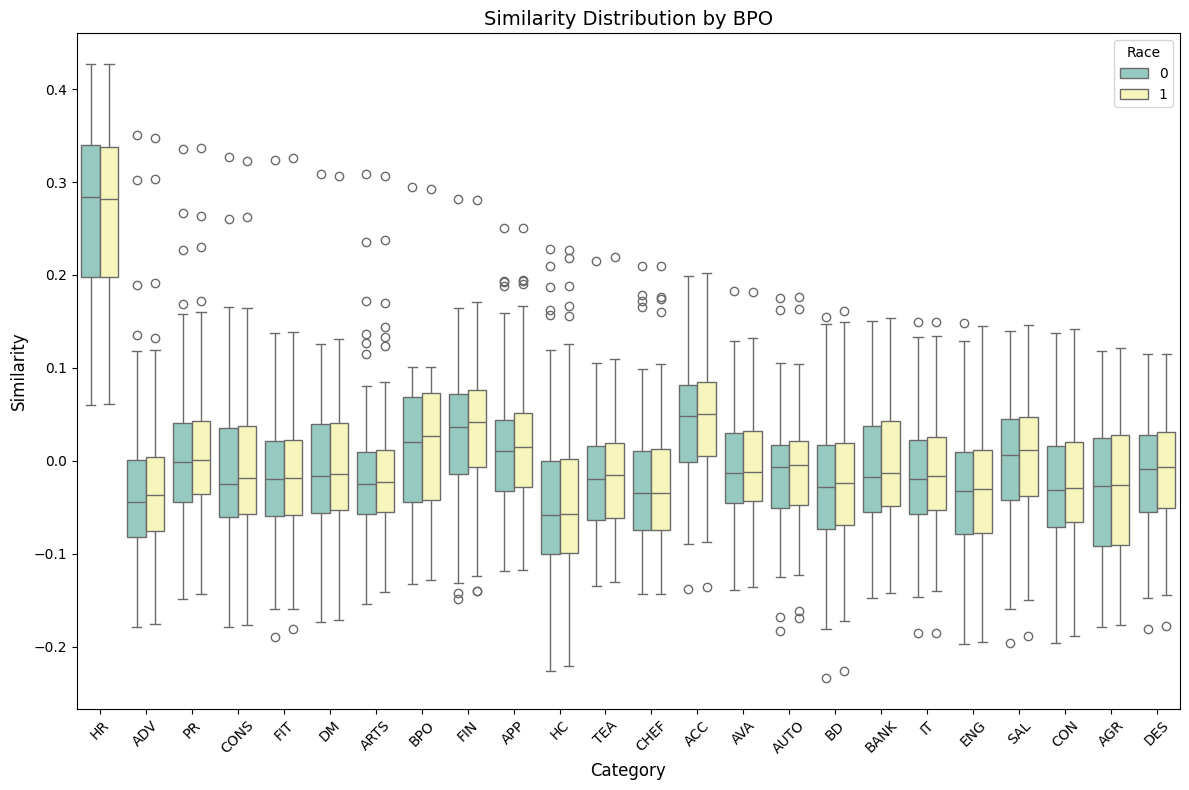

In [29]:
# 箱体：
# 上下边界分别是第 25 和第 75 百分位数（IQR）。
# 中线：
# 表示中位数。
# 须线：
# 延伸至 1.5 倍 IQR 的范围。
# 离群点：
# 超出须线范围的点。
labels = ['HR', 'DES', 'IT', 'TEA', 'ADV', 'BD', 'HC', 'FIT', 'AGR', 'BPO', 'SAL',
           'CON', 'DM', 'AUTO', 'CHEF', 'FIN', 'APP', 'ENG', 'ACC', 'CONS', 'PR', 'BANK', 'ARTS', 'AVA']
plt.figure(figsize=(12, 8))
sns.boxplot(x="job_short", y="Similarity", hue="race_encoded", data=result_sorted, palette="Set3")
plt.title("Similarity Distribution by BPO", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Similarity", fontsize=12)
plt.xticks(rotation=45)  # 旋转 X 轴标签以防止重叠s
plt.legend(title="Race")
plt.tight_layout()
plt.savefig("all_categories_boxplot.png")
plt.show()



In [800]:
professions = ['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 
                   'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 
                   'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 
                   'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 
                   'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']
rank_cutoffs = [10,20,30,40,50]
rRD_list = []
gED_list = []
meanRank_list = []
for profession in professions:
    path = 'D:/wfy/code/LLM-fairness/Fair_resume/results/lr-0.0001-lam-2.5-model_iter-19/result_{}.csv'.format(profession)
    result = pd.read_csv(path)
    result["Gender"] = result["Gender"].apply(lambda x: 1 if x == 1 else -1)
    #result["Gender"] = result["gender"].apply(lambda x: 1 if x == 'Male' else -1)
    
    # result["Race"] = result["Race"].apply(lambda x: 1 if x == 1 else -1)
    result_sorted = result.sort_values(by='Similarity',ascending=False, inplace=False)
    
    test = result_sorted[:50]

    rRD = compute_rRD(df=result_sorted[:50],rank_cutoffs=rank_cutoffs)
    gED = GED(result_sorted=result_sorted)
    meanRank_0, meanRank_1= mean_rank (result_sorted=test)

    rRD_list.append(rRD)
    gED_list.append(gED)
    meanRank_list.append((meanRank_0, meanRank_1))

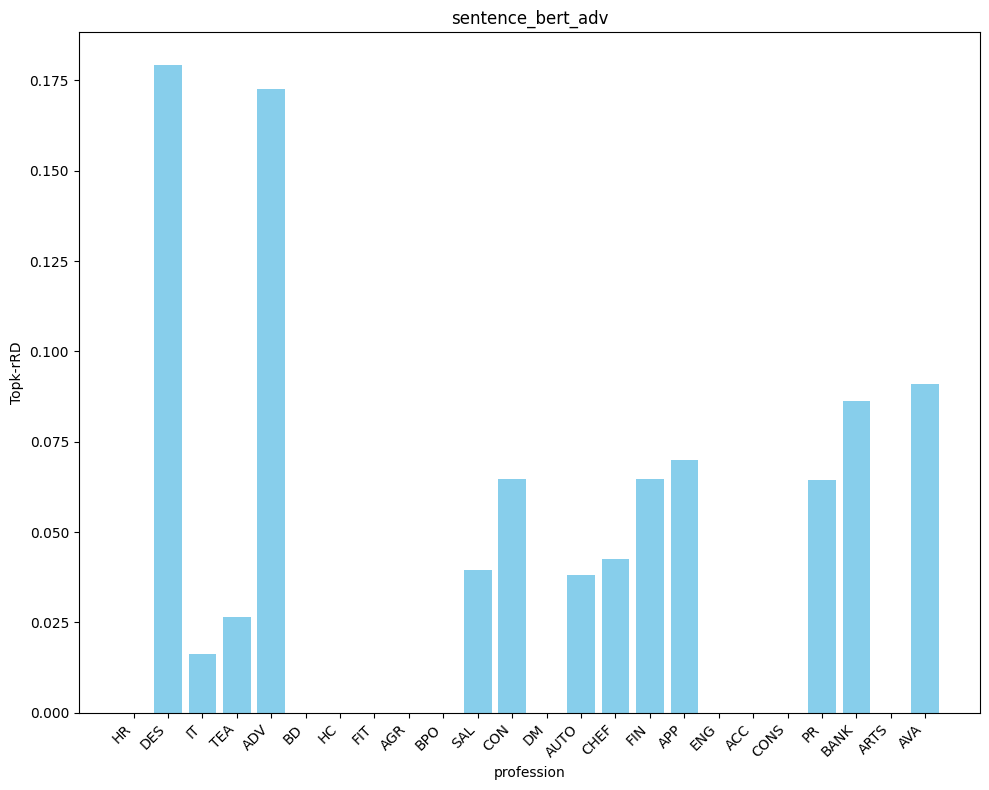

In [801]:
import matplotlib.pyplot as plt

# Values and labels from the user's input
values = rRD_list
labels = ['HR', 'DES', 'IT', 'TEA', 'ADV', 'BD', 'HC', 'FIT', 'AGR', 'BPO', 'SAL',
           'CON', 'DM', 'AUTO', 'CHEF', 'FIN', 'APP', 'ENG', 'ACC', 'CONS', 'PR', 'BANK', 'ARTS', 'AVA']

# Creating the bar plot
plt.figure(figsize=(10, 8))
plt.bar(labels, values, color='skyblue')
plt.xlabel('profession')
plt.ylabel('Topk-rRD')
plt.title('sentence_bert_adv')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Display the plot
plt.show()


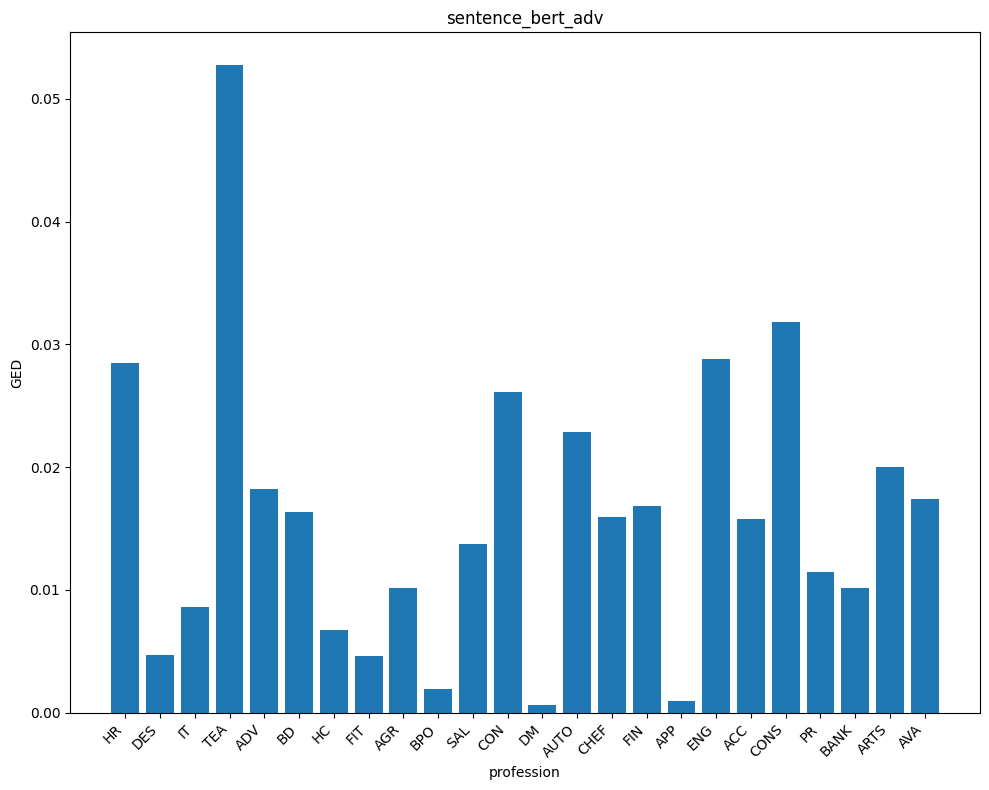

In [759]:
import matplotlib.pyplot as plt

# Values and labels from the user's input
values = gED_list
labels = ['HR', 'DES', 'IT', 'TEA', 'ADV', 'BD', 'HC', 'FIT', 'AGR', 'BPO', 'SAL',
           'CON', 'DM', 'AUTO', 'CHEF', 'FIN', 'APP', 'ENG', 'ACC', 'CONS', 'PR', 'BANK', 'ARTS', 'AVA']

# Creating the bar plot
plt.figure(figsize=(10, 8))
plt.bar(labels, values, )
plt.xlabel('profession')
plt.ylabel('GED')
plt.title('sentence_bert_adv')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Display the plot
plt.show()

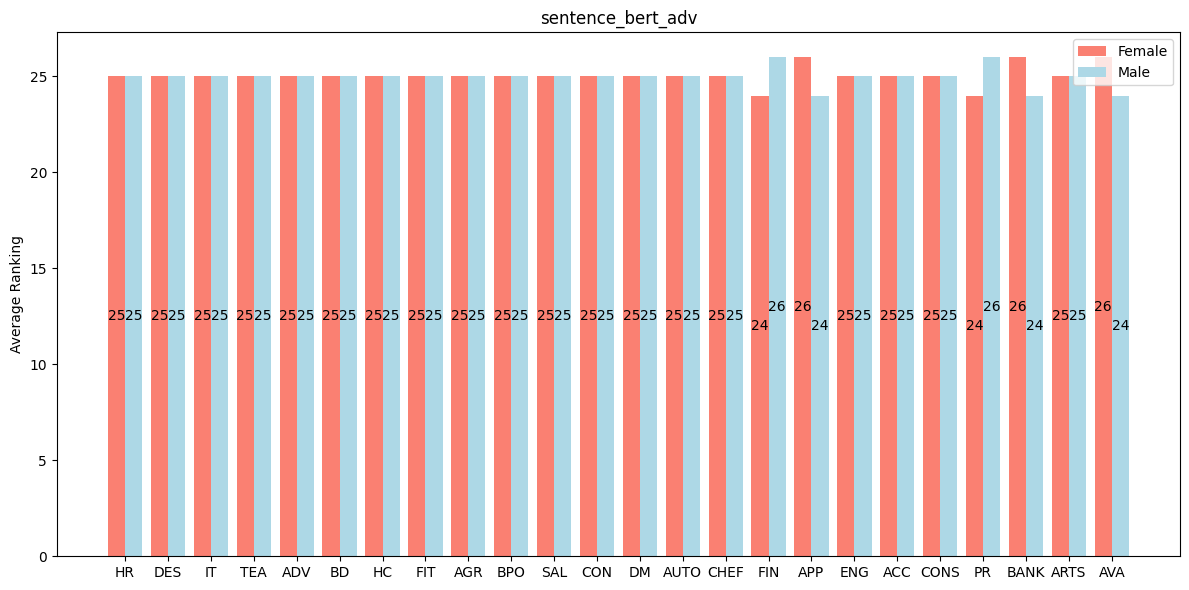

In [802]:
positions =['HR', 'DES', 'IT', 'TEA', 'ADV', 'BD', 'HC', 'FIT', 'AGR', 'BPO', 'SAL',
           'CON', 'DM', 'AUTO', 'CHEF', 'FIN', 'APP', 'ENG', 'ACC', 'CONS', 'PR', 'BANK', 'ARTS', 'AVA']

# 平均排名数据，假设数据
female_rankings = []
male_rankings = []
for item in meanRank_list:
    female_rankings.append(int(item[0]))
    male_rankings.append(int(item[1]))

x = np.arange(len(positions))  # 标签位置
width = 0.4  # 柱子的宽度
fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, female_rankings, width, label='Female', color='salmon')
rects2 = ax.bar(x + width/2, male_rankings, width, label='Male', color='lightblue')

# 添加一些文本标签
ax.set_ylabel('Average Ranking')
ax.set_title('sentence_bert_adv')
ax.set_xticks(x)
ax.set_xticklabels(positions)
ax.legend()

# 在柱子上添加数字标签
def autolabel(rects):
    """Attach a text label inside each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),  # 修改位置到柱体中心
                    xytext=(0, 0),  # 不偏移
                    textcoords="offset points",
                    ha='center', va='center', color='black')  # 居中显示，白色字体以便在深色背景上可见

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

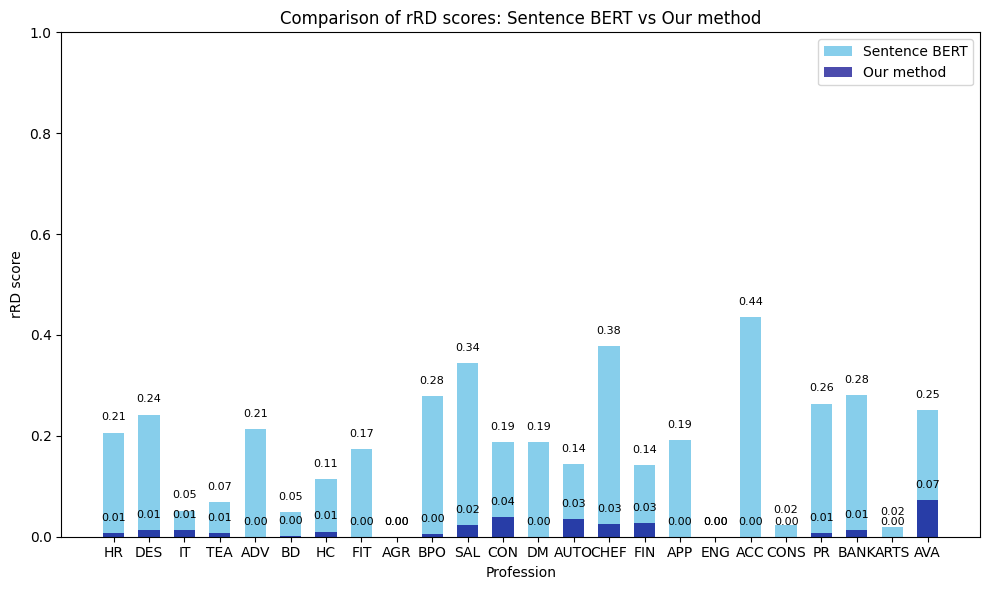

In [699]:

positions =['HR', 'DES', 'IT', 'TEA', 'ADV', 'BD', 'HC', 'FIT', 'AGR', 'BPO', 'SAL',
           'CON', 'DM', 'AUTO', 'CHEF', 'FIN', 'APP', 'ENG', 'ACC', 'CONS', 'PR', 'BANK', 'ARTS', 'AVA']
our_method = [0.007727089239307801, 0.012627012835650568, 0.012627012835650568, 0.007727089239307801, 0.0, 0.0015921099539570442, 0.010211057494605961, 
0.0, 0.0, 0.004745638366304104, 0.02287287401615129, 0.038692894236773835, 0.0, 0.03486897869060808, 0.02511399024035822, 0.027871279547568656,
 0.0, 0.0, 0.0, 0.0, 0.0068465785063607995, 0.012627012835650568, 0.0, 0.073188839116198]
sentence_bert = [0.20647149087893402, 0.24217910812771462, 0.051818256067372344, 0.06830718066994838, 0.21342915358224696,
                  0.04820324799854612, 0.11447948655410903, 0.1736322928419899, 0.0, 0.27861276167821314, 0.3445295513130134, 0.18852751085480346, 0.18729292740892403, 0.14462310243609328, 0.37764692588378695, 0.14245752311929516, 0.19193525775432438, 0.0, 0.4361257431090059,
                  0.022853285789337045, 0.264061808980117, 0.2801447431276234, 0.018523259080471983, 0.25135227244613445]

# 设置柱状图的宽度
bar_width = 0.6
x = np.arange(len(positions))  # X轴的位置

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱体：先绘制 Original model 的部分，再叠加 Debiased model
ax.bar(x, sentence_bert, width=bar_width, color='skyblue', label='Sentence BERT')
ax.bar(x, our_method, width=bar_width, color='darkblue', label='Our method', alpha=0.7)

# 设置Y轴刻度范围为 0 到 1
ax.set_ylim(0, 1)

# 添加标签和标题
ax.set_xticks(x)
ax.set_xticklabels(positions)
ax.set_ylabel('rRD score')
ax.set_xlabel('Profession')
ax.set_title('Comparison of rRD scores: Sentence BERT vs Our method')
ax.legend()

# 在柱体上显示数值
for i, v in enumerate(sentence_bert):
    ax.text(x[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(our_method):
    ax.text(x[i], v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

# 显示图形
plt.tight_layout()
plt.show()
